## Uczenie nienadzorowane

* analiza skupień (grupowanie, *clustering*)
* ekstrakcja cech 
* redukcja wymiaru

 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>

# ANALIZA SKUPIEŃ (grupowanie, *clustering*)

1. Przykłady konkretnych zastosowań:
    * segmentacja klientów (dopasowanie ofery (np. umowy na telefon) do klienta, generowanie rekomendacji w sklepie www, 
        * podobne preferencje zakupowe (np. jedzenie)
        * podobne zachowania (np. stosunek do promocji)
    * grupowanie produktów
        * podobne parametry/właściwości
    * grupowanie tekstów
        * teksty podobne tematycznie
    * grupowanie w analizie obrazów
        * grupowanie obrazów o podobnych treściach
        * grupowanie fragmentów obrazu
    * biologia
        
<br>
        
2 . Grupowanie jak element procesu:
       * systemy rekomendacyjne
       * personalizacja treści
       * analiza obrazów
       

 <br>
 
 <br>

# Plan dnia

1. Algorytm k-średnich

2. Grupowanie hierarchiczne

3. DBSCAN


 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>

_____

## Definicja skupienia (klastra)

<img src="http://www.sthda.com/sthda/RDoc/images/dbscan-idea.png" width="800">
Źródło: http://www.sthda.com/sthda/RDoc/images/dbscan-idea.png

## W praktyce jest to szalenie istotna kwestia!

W zależności od tego co chcemy otrzymać jako skupienie, musimy podać odpowiedniemu algorytmowi dane w odpowiedniej postaci!

### Dlatego ocena jakości grupowania jest bardzo trudna :( :( :(


 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>

## Algorytm k-średnich

Demo:

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

W jakich przypadkach algorytm działą dobrze ("założenia"):
- dane "wyspowe"
- jednorodne klastry
- równe liczności klastrów

https://www.youtube.com/watch?v=5I3Ei69I40s

Skąd algorytm wie kiedy się zatrzymać?

Dopóki środki przestaną się ruszać? - to działa tylko na trywialnych przykładach obrazkowych. Na rzeczywistych dużych danych na zatrzymanie możemy sobie trochę poczekać...

Algorytm K-średnich dąży do minimalizacji zmienności wewnątrzgrupowej (*inertia*):

## Inercja = $\sum\limits_{i=1}^K \sum\limits_{x \in C_i} ||x-\mu_i||^2 = \sum\limits_{i=1}^K n_i\cdot Var(C_i)$


Algorytm iteruje dopóki zmiana tej wielkości między kolejnymi krokami nie będzie mniejsza niż zadany próg.

### $\frac{Inertia(n)-Inertia(n+1)}{Inertia(n)} < t$

Nie musi to oznaczać, że nic się już nie zmieniło, tak jak jest to w prostych przykładach!

Uwaga: powyżej mamy inercję całkowitą - dla całych danych. Gdy będzie mowa o inercji klastra, to oznacza ona jego wariancję.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

%matplotlib inline

points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

In [ ]:
plt.scatter(points[:,0],points[:,1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters=3,n_jobs=5)

model.fit(points)

labels = model.predict(points)

print(labels)

In [ ]:
plt.scatter(points[:,0],points[:,1],c=np.array(["red","green","blue"])[np.array(labels)])
plt.show()

In [ ]:
plt.scatter(points[:,0],points[:,1],c=np.array(["red","green","blue"])[np.array(labels)],alpha=0.3)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=["blue","green","red"],s=50)
plt.show()

In [ ]:
model = KMeans(n_clusters=3,verbose=1)
model.fit(points)

### Ćwiczenie: wygenerować poniższe dane i dopasować model z trzema klastrami 

In [ ]:
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,20),np.array([[4,0],[0,4]]),30)],axis=0)

In [ ]:
plt.scatter(points[:,0],points[:,1])
plt.show()

In [ ]:
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(points)

plt.scatter(points[:,0],points[:,1],c=np.array(["red","blue","green"])[labels])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=60,c="yellow")
plt.show()

### Wiemy już jak działą algorytm. Teraz będziemy analizować jak działą dla różnych danych. Na razie rozpatrujemy sytuacje, w których wiemy ile mamy klastrów

# Transformacje danych - dane, które podajemy algorytmomwi mają ogromne znaczenie!

## Transformacja zmiennych

Generujemy dane:

In [ ]:
rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)
labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

Zadanie: dopasować model (z dowma klastrami), pokolorować grupy i zaznaczyć średnie

In [ ]:
model = KMeans(n_clusters=2)
groups = model.fit_predict(points)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[groups])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",s=60,c="yellow")

plt.xlim(0,30)
plt.ylim(0,30)

plt.show()

Widzimy, że pogrupowało się po y...

Gdy różnica na osi y jest znacząco większa niż rożnica na osi x (y >>x)- patrząc na odegłość euklidesową w takiej sytuacji zachodzi:

$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} \approx \sqrt{(y_1-y_2)^2})$

Czyli grupowanie opiera się na zmiennej (zmiennych) dominującej

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
points = scaler.fit_transform(points) #SREDNIA 0 I SD 1

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])

plt.show()

In [ ]:
model = KMeans(n_clusters=2)
groups = model.fit_predict(points) # pierwszy raz się pojawia FIT_PREDICT - ZWRÓCIĆ UWAGĘ

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[groups])

plt.show()

### Wersja z pipelinem:

In [ ]:
from sklearn.pipeline import make_pipeline

sc = StandardScaler()
km = KMeans(2)

scaled_kmeans = make_pipeline(sc,km)

labels = scaled_kmeans.fit_predict(points)

print(labels)

## Transformacja obserwacji

Generujemy dane:

In [ ]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

### Zadanie: dopasować model i zwizualizować.

In [ ]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(points)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue"])[groups])
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)

plt.show()

In [ ]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
points2 = normalizer.fit_transform(points)


plt.scatter(points2[:,0],points2[:,1])
plt.hlines(0,-1,1)
plt.vlines(0,-1,1)
plt.show()

In [ ]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(points2)

plt.scatter(points2[:,0],points2[:,1],c = np.array(["red","green","blue"])[groups])
#plt.hlines(0,-15,15)
#plt.vlines(0,-15,15)
plt.show()

Przykłady zastosowań normalizacji?
    - ogólnie sytuacje, gdy nie interesują nas wartości bezwzględne, ale proporcje (np. gdy grupujemy dokumenty chcąc uzyskać w klastrach dokumenty o podobnej zawartości, a dokumenty są różnej długości)

### Ćwiczenie

In [ ]:
data =pd.read_csv("Dane/fish.csv", sep=";",decimal=",")

In [ ]:
data.describe()
# """BE CLOSE TO YOUR DATA""" -> mamy rybę z zerową wagą

Mamy zadane grupy - species - będziemy ich używać do oceny grupowania

In [ ]:
#for i in data.Species.unique():
#    plt.scatter(data.loc[data.Species==i,"Height"],data.loc[data.Species==i,"Length2"],label=i)
#plt.xlim(0,50)
#plt.legend()
#plt.show()

In [ ]:
data = data[data.Weight>0]

In [ ]:
model = KMeans(n_clusters=7).fit(data.drop('Species',axis=1))
pd.crosstab(data.Species,model.predict(data.drop('Species',axis=1)))

# Miara V-score - miara, która mierzy w pewien sposób jak klastry rozkładają się względem zadanych etykiet.


https://clusteval.sdu.dk/1/clustering_quality_measures/15

In [ ]:
from sklearn.metrics.cluster import v_measure_score

v_measure_score(data.Species,model.predict(data.drop('Species',axis=1)))

In [ ]:
species = data.Species
data = data.drop('Species',axis=1)

In [ ]:
plt.figure()
data.hist(figsize=(15,10),xlabelsize=10,layout=(2,3))
plt.show()

In [ ]:
scaler = StandardScaler()

In [ ]:
data2 = pd.DataFrame(scaler.fit_transform(data))
data2.describe()

plt.figure()
data2.hist(figsize=(15,10),xlabelsize=10,layout=(2,3))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)

In [ ]:
pipeline = make_pipeline(scaler,kmeans)

In [ ]:
groups = pipeline.fit_predict(data)

In [ ]:
pd.crosstab(species,groups)

In [ ]:
v_measure_score(species,groups)

# Wyznaczanie liczby klastrów 

## Dokładna ocena wyniku grupowania jest bardzo trudna i praktycznie niemożliwa. Na szczęście w praktyce bardzo dokładna ocena z reguły nie jest potrzebna. 

*Klastrowanie nigdy nie będzie idealne (tak samo jak klasyfikatory nie mają 100% accuracy).*

I krok. 
* Uwzględnienie wiedzy a priori (wiedzy dziedzinowej, wiedzy eksperciej).
    * intuicja, doświadczenie, "wiedza ekspercka" (np. grupujemy tematycznie książki, które mamy w ofercie: czy 2 klasstry mają sens? czy 10000 klastór ma sens?)
    * założenia biznesowe (jeżeli grupujemy klientów celem dopasowania odpowiedniej oferty, to grup będzie tyle ile róznych ofert jesteśmy w stanie zaproponować; zależność dwukierunkowa - realia mogą narzucać liczbę grup, lub model może sugerować liczbę ofert) 
    * Z reguły będziemy w stanie określić przedział dla sensownych wartości

II krok.
* Ocena na oko - przeglądamy obserwacje i patrzymy czy podobne są w tych samych klastrach i czy w różnych klastrach są obserwacje niepodobne
    * ocena nie jest dokładna, ale bardzo wartościowa
    * trzeba uważać, bo dużej próbki nie będziemy oceniać i nasza ocena jest obarczona BARDZO DUŻĄ niepewnością (statystyka!)
    * trochę przewrotnie często jest to często najlepsza i wystarczająca metoda oceny

III krok. 
* Obliczanie miar jakości podziału - obliczanie numerycznych mierników jakości grupowania. 
    * Ciężko dobrać miarę, trudno zinterpretować, wcale nie musi się pokrywać z optymalnym rozwiązaniem z perspektywy problemu biznesowego...
    * Ale przynajmniej mamy konkretną liczbę, która cokolwiek mówi


IV krok.
* Ocena na podstawie jakości całego procesu, w którego to grupowanie jest elementem 
    * czasochłonna i często trudna do zrealizowania z powodu realiów...
    * dobra, bo widzimy dokładnie to co tak naprawdę nas interesuje - wynik końcowy procesu
    * słaba, bo na wynik całego procesu wpływ mają też inne czynniki
    
    
### Zajmiemy się punktem trzecim - miary numeryczne

### Tworzymy dane:

In [ ]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))

points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

### Zadanie - Zobrazować środki klastrow w zależności od liczby klastrów. Następnie zrobić wykres inercji od liczby klastrów

In [ ]:
ks = range(1, 7)
inertias = []

plt.figure(figsize=(20,10))

for k in ks:
    
    model = KMeans(n_clusters=k)

    model.fit(points)
    labels = model.labels_
    
    inertias.append(model.inertia_)
    
    plt.subplot(2,3,k)
    plt.scatter(points[:,0],points[:,1],c=colors[labels],alpha=0.3)
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=colors,s=50)

plt.show()

In [ ]:
# Plot ks vs inertias

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

### Jak wybrać optymalne K? - Reguła łokcia


 <br>
 
 <br>
 
 <br>

### Miara silhouette_score

Najpierw objaśnienie graficzne na tablicy, potem wzór, potem rysunki

https://en.wikipedia.org/wiki/Silhouette_(clustering)

Wielkość dla jednego punktu:

# $s(i) = \frac{b(i)  - a(i)}{max\{a(i),b(i)\}}$

$a(i)$ - średnia odległość punktów od punku i w danym klastrze

$b(i)$ - średnia odległość punktów z najbliższego klastra od punku i

Wartości z [-1,1]. Im większa wartość tym lepiej.

Ocena ostateczna: średnia globalna z s(i) wszystkich punktów.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

ks = range(2, 7)
silhouette = []

for k in ks:
    
    model = KMeans(n_clusters=k)
    
    model.fit(points)
    
    silhouette.append(silhouette_score(points,model.predict(points)))

In [ ]:
# Plot ks vs silhouette

plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

# Zadanie - Spróbować wyznaczyć liczbę klastrów dla poniższych danych


In [ ]:
from sklearn.datasets import make_blobs

points, l = make_blobs(1000,centers=100,cluster_std=0.1)

plt.scatter(points[:,0],points[:,1])
plt.show()

In [ ]:
inertia = []
for i in range(10,100):
    km = KMeans(i)
    inertia.append(km.fit(points).inertia_)
    
plt.plot(range(10,150),inertia)
plt.show()

In [ ]:
ks = range(10, 100)
silhouette = []

for k in ks:
    
    model = KMeans(n_clusters=k)
    
    model.fit(points)
    
    silhouette.append(silhouette_score(points,model.predict(points)))
    
# Plot ks vs silhouette

plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.xticks(ks[::5])


plt.show()

### Ćwiczenie - wyznaczyć liczbę klastrów na danych fish

In [ ]:
data =pd.read_csv("Dane/fish.csv", sep=";",decimal=",")

In [ ]:
#data = data[data.Weight>0]
data.iloc[:,0:-1] = StandardScaler().fit_transform(data.iloc[:,0:-1])
inertia = []
sil = []

for k in range(2,11):
    km = KMeans(k)
    m = km.fit(data.iloc[:,0:-1])
    inertia.append(m.inertia_)
    sil.append(silhouette_score(data.iloc[:,0:-1],m.predict(data.iloc[:,0:-1])))

plt.plot(range(2,11),inertia)
plt.show()
plt.plot(range(2,11),sil)
plt.show()

### Zadanie: porównać sytuację, gdy wyrzucamy lub nie rybę z zerową wagą



## Na zakończenie k-średnich jeszcze ćwiczenia na transformacje. Cel - przekształcić zmienne ciagłymi transformacjami - tzn- robimy żadnych ifów, tylko przekształacamy zmienne konkretnym wyrażeniem matematycznym (jedną zmienną albo obie), tak aby alorytm k-średnich dobrze wykrył klastry

Wygenerować dane, dopasować model i zwizualizować wynik

In [ ]:
x1 = rnd.multivariate_normal((0,0),[[1000,0],[0,5]],1000)
x1 = x1[x1[:,0]>0,:]

x2 = rnd.multivariate_normal((50,10),[[1,0],[0,1]],1000)

x = np.vstack([x1,x2])

plt.scatter(x[:,0],x[:,1])
plt.show()

In [ ]:
kmeans = KMeans(2)
kmeans.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=np.array(["red","blue"])[kmeans.labels_])
plt.show()

In [ ]:
sc = StandardScaler()
x2 = sc.fit_transform(x)

l = kmeans.fit_predict(x2)
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue"])[l])
plt.show()

In [ ]:
x2 = x.copy()
x2[:,1] = 10*x2[:,1]
l = kmeans.fit_predict(x2)
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue"])[l])
plt.show()

In [ ]:
x2 = x.copy()
x2[:,0] = 3*np.log(1.1*x2[:,0])
l = kmeans.fit_predict(x2)
centers = kmeans.fit(x2).cluster_centers_
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue"])[l])
plt.scatter(centers[:,0],centers[:,1],marker="D",c="yellow",s=70)
plt.show()

Co zrobiliśmy? Celowo "przypisaliśmy większą wagę" jednej zmiennej.

### Ćwiczenie 2

In [ ]:
x1 = rnd.multivariate_normal((20,0),[[1000,0],[0,5]],1000)
x1 = x1[x1[:,0]>20,:]


x2 = rnd.multivariate_normal((0,0),[[0.1,0],[0,1]],1000)

x3 = rnd.multivariate_normal((10,0),[[1,0],[0,1]],1000)

x = np.vstack([x1,x2,x3])
plt.scatter(x[:,0],x[:,1])
plt.show()

In [ ]:
kmeans = KMeans(3)
kmeans.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=np.array(["red","blue","green"])[kmeans.labels_])
plt.show()

In [ ]:
x2 = x.copy()
x2[:,0] = 2*np.log(2+x2[:,0])

l = kmeans.fit_predict(x2)
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue","green"])[l])
plt.show()

# Bardzo częsta sytuacja w życiu - skośny rozkład.
 - zarobki: chcemy grupować względem danych demograficznych. Z perpspetkty grupowanie względem danych socjo-demograficznych, rożnica między zarobkami 2000 a 4000, to nie to samo co 10 000 a 12 000
 - ilość kupionego produktu: Z perpektywy grupowania klientów względem potrzeb/preferencji zakupowych, różnica między 0 a 3 to nie to samo co między 20 a 23

<br>

<br>

<br>

<br>

<br>

<br>

# Grupowanie hierarchiczne

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Ćwiczenie obrazujące

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
dane = np.array([[1,1],[2,1],[4.1,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

In [ ]:
d = linkage(dane)
d

In [ ]:
?linkage

In [ ]:
dendrogram(d)
plt.show()

In [ ]:
d = linkage(dane,"complete")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

### Metoda Ward - odległość jest równa wzrostowi sumy kwadratów odległości w w yniku połączenia danych dwóch klastrów (uwaga: są różne równoważne definicje tej miary). Metoda Ward minimalizuje wzrost wariancji (inercji).

$d(i,j) = SS_{i\cup j} - (SS_i + SS_j)$

$SS(C) = \sum\limits_{x\in C} (x - \mu_C)^2$


In [ ]:
d = linkage(dane,"ward")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

In [ ]:
d = linkage(dane,"average")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

### Zadanie pokazowe na przećwiczenie miar

In [2]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
labels = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)

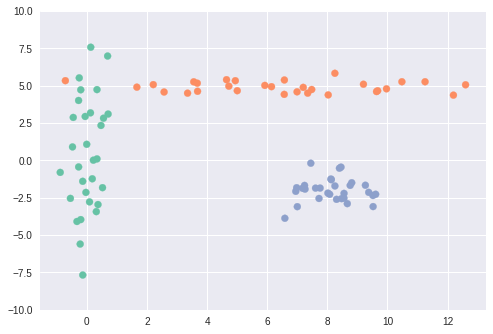

In [3]:
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels])
plt.ylim(-10,10)
plt.show()

NameError: name 'linkage' is not defined

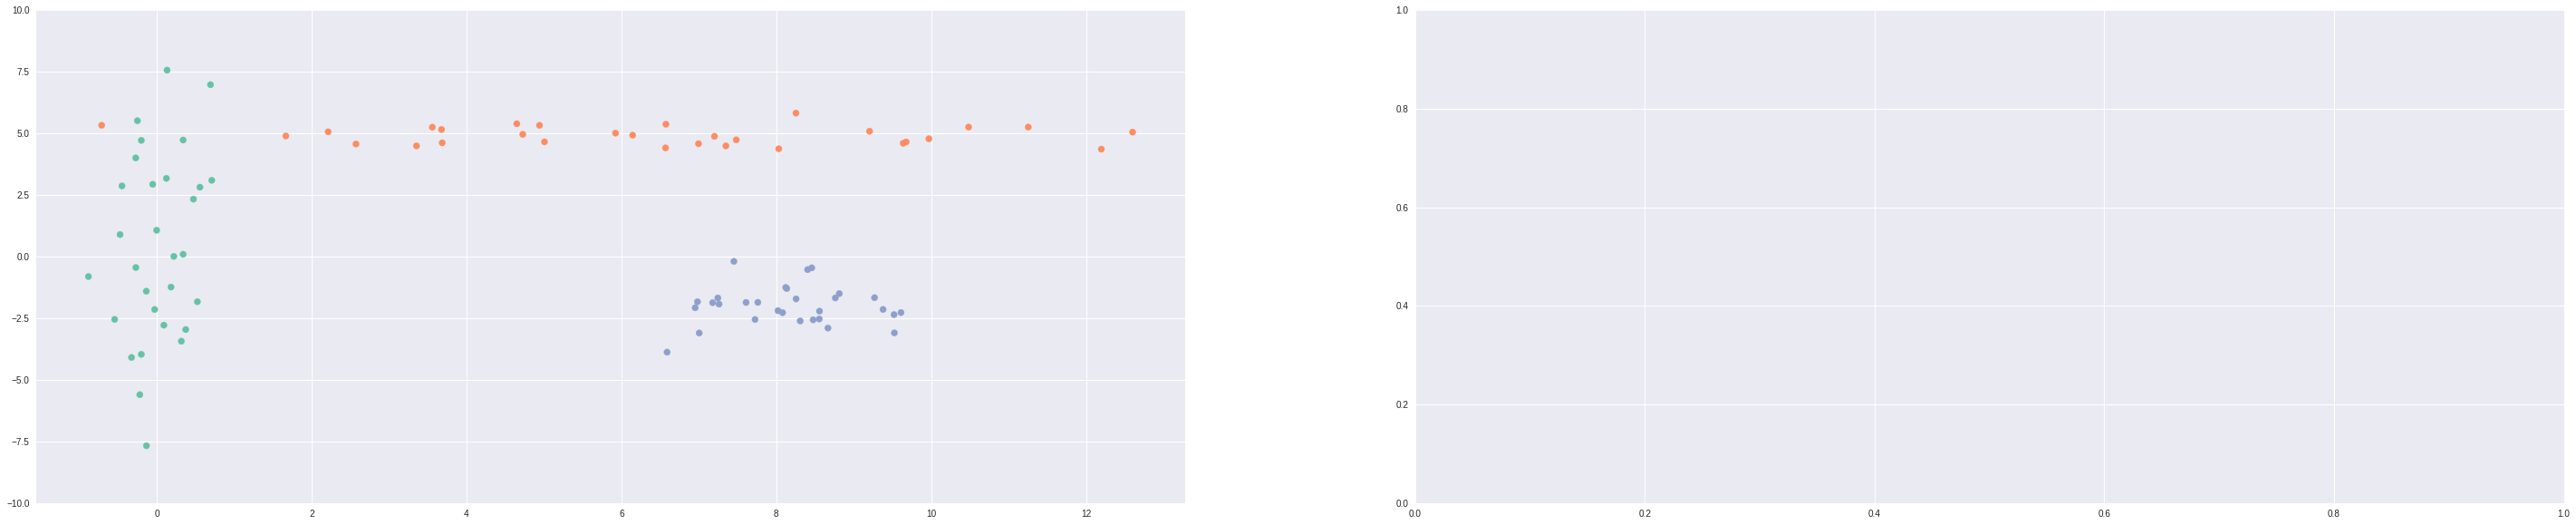

In [4]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="ward")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="average")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="single")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="complete")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

### Zadanie

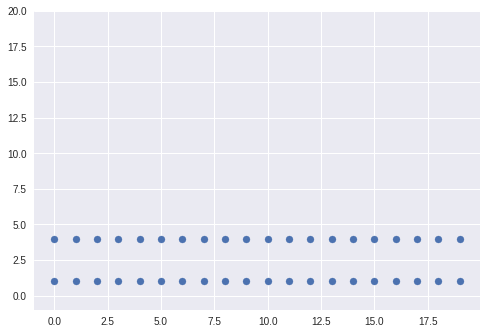

In [5]:
x = np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T

plt.scatter(x[:,0],x[:,1])
plt.ylim(-1,20)
plt.show()

In [ ]:
m = linkage(x,"ward")
dendrogram(m)
plt.show()

In [ ]:
m = linkage(x,"single")
dendrogram(m)
plt.show()

### Grupowanie ziaren zbóż

In [ ]:
samples = np.loadtxt("Dane/seeds_dataset.txt")

In [ ]:
samples = pd.DataFrame(samples)

In [ ]:
samples.columns = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", 
                   "kernel_groove_length", "variety"]

In [ ]:
samples.head()

In [ ]:
samples.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler #, scale

sc = StandardScaler()
samples2 = pd.DataFrame(sc.fit_transform(samples.iloc[:,0:-1]),columns=samples.columns[:-1])
samples2["variety"] = samples.variety


In [ ]:
samples2.describe()

### Najpierw zrobić na surowych danych, a potem na przeskalowanych - przeanalizować zachowanie różnych łączeń

In [ ]:
samples3 = np.array(samples.sample(n=50))

mergings = linkage(samples3[:,0:7],method="complete")

dendrogram(mergings,
           labels=samples3[:,7].astype(int),
           leaf_rotation=0,
           leaf_font_size=8,
)
plt.show()

# Wyznaczanie liczby klastrów

Bierzemy ponownie dane z przykładu wprowadzającego - ale zmieniamy punkt (4,1) na (6,1)

In [ ]:
dane = np.array([[1,1],[2,1],[6,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

###1. Na podstawie dendrogramu

In [ ]:
mergings = linkage(dane,method="single")
dendrogram(mergings)
plt.show()

### Intuicja - obcinamy tam, gdzie skok już jest "duży" lub na oko oceniamy ile sensownych klastrów tu widzimy

### Jak mamy duży zbiór, to można wylosować próbkę, na której można wizualnie ocenić próg obcięcia

In [ ]:
from scipy.cluster.hierarchy import fcluster

?fcluster

In [ ]:
fcluster(mergings,t=1,criterion="distance")

### 2. Gdy wiemy ile chcemy mieć klastrów:

In [ ]:
fcluster(mergings,3,"maxclust")

Istnieją też inne metody. W praktyce niezbyt użyteczne... ale można zawsze można sobie o nich poczytać

### Zadanie wyznaczyć liczbę clustrów dla zbioru ziaren

In [ ]:
samples2.describe()

In [ ]:
mergings = linkage(samples2.iloc[:,:-1],"ward")

labels = fcluster(mergings,15,criterion="distance")

dendrogram(mergings)
plt.show()

ct = pd.crosstab(labels,samples.variety)

# Display ct
print(ct)

from sklearn.metrics.cluster import v_measure_score

v_measure_score(labels, samples.variety)

##Zadanie: pogrupować hierarchicznie kraje na podstawie oddanych przez nie głosów w eurowizji

In [ ]:
##dane = pd.read_csv("Dane/eurowizja.csv") - tego pliku nie ma
##dane.set_index(dane.columns[0],inplace=True)
## lub gdy chcemy sobie wczytac pliki matlabowe:

from scipy.io import loadmat
dane = loadmat("Dane/eu_song_2014.mat")["x"][0][0][0]
k1 = loadmat("Dane/eu_song_2014.mat")["x"][0][0][1][0][0]
k2 = loadmat("Dane/eu_song_2014.mat")["x"][0][0][5]
dane = pd.DataFrame(dane,columns=k2)
dane.set_index(k1,inplace=True)
dane.head()

In [ ]:
dane.head()

In [ ]:
mergings = linkage(dane,metric="euclidean",method="average")

plt.figure(figsize=(15,10))
dendrogram(mergings, 
           labels = dane.index, 
           leaf_rotation=45,
           leaf_font_size=15)
plt.show()

### Grupowanie hierarchiczne w sklearn:

In [1]:
from sklearn.cluster import AgglomerativeClustering

In [2]:
?AgglomerativeClustering

<br>

<br>

# Dbscan 

<img src="https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/53842/versions/4/screenshot.png" width="400">
Źródło: https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/53842/versions/4/screenshot.png

### Kluczowy fakt: obserwacje znajdujące się w jednym klastrze mogą być bardzo "różne" - daleki od siebie


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" width="400">
Źródło: https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png

### Druga ważna cecha - nie przyporządkowuje do klastrów wszystkich obserwacji

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
?DBSCAN

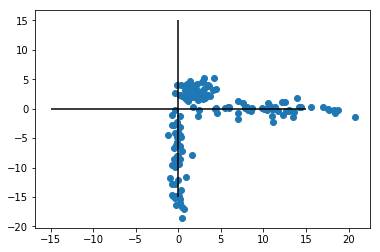

In [7]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

# Wskazówki odnoście wyboru parametrów - wyznaczanie epsilona z danych

In [13]:
?plt.hist

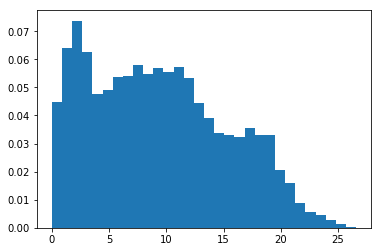

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
x = euclidean_distances(points)

plt.hist(x[np.tril_indices(x.shape[0])],normed=True,bins=30)#,cumulative=True
plt.show()

In [24]:
# Ocena na oko dla różnych k najblizszych sasiadów
k=5
y = np.sort(x,axis=1)[:,1:]
y[::10,:k]

array([[0.23301385, 0.37271891, 0.54032489, 0.74287846, 0.75137906],
       [0.30543396, 0.6382747 , 0.7854183 , 0.82365651, 0.86747258],
       [0.12588155, 0.45890474, 0.52027958, 0.80781283, 0.84463216],
       [0.37271891, 0.41442152, 0.44118495, 0.49738758, 0.52227744],
       [0.17819289, 0.24138058, 0.41879817, 0.50053067, 0.58794076],
       [0.77416365, 1.13162832, 1.21155214, 1.33355795, 1.3577261 ],
       [0.314036  , 0.42946954, 0.53003321, 0.79541804, 0.80125882],
       [0.39112321, 0.45432619, 0.54980615, 1.07509231, 1.24394711],
       [0.29429512, 0.32764301, 0.86397041, 0.8670368 , 0.8896627 ],
       [0.52475031, 0.57833157, 1.14879039, 1.19761622, 1.20944036],
       [0.35617842, 0.60819673, 0.63699218, 0.73012757, 0.93579894],
       [0.34724214, 0.36145126, 0.383606  , 0.483339  , 0.60689936],
       [0.42780463, 0.72244573, 0.77271517, 0.85922388, 1.58961251],
       [0.02598956, 0.54364712, 0.60446393, 0.67302241, 1.05874747],
       [0.22122303, 0.34724214, 0.

In [ ]:
model = DBSCAN(1.7,3)
labels = model.fit_predict(points)
plt.scatter(points[:,0],points[:,1],c=labels+1)
plt.show()

Ćwiczenia na dobór parametrów

In [ ]:
rnd.seed(12345)
data = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),100),
                    rnd.multivariate_normal((5,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((10,0),np.array([[1,0],[0,1]]),100)],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [ ]:
dbs = DBSCAN(2,80)
dbs.fit_predict(data)
print(dbs.labels_)
colors  = np.array(["red","green","blue","grey","purple","yellow"])
for i in np.unique(dbs.labels_):
    plt.scatter(data[dbs.labels_==i,0],data[dbs.labels_==i,1],c=colors[i],label= i)
plt.legend()
plt.show()

In [ ]:
x = np.linspace(0,10*np.pi,31)
y = np.cos(x/10)+rnd.normal(0,0.01,len(x))

x = np.tile(x,2)
y = np.concatenate([y, y+1.2])

data = np.column_stack([x,y])
plt.scatter(data[:,0],data[:,1])
plt.show()

In [ ]:
dbs = DBSCAN(1.1,2)
dbs.fit_predict(data)

plt.scatter(data[:,0],data[:,1],c=np.array(["red","blue","green"])[dbs.labels_])
plt.show()

In [ ]:
rnd.seed(123)
data = np.concatenate([rnd.uniform((0,0),(10,20),(200,2)),
                    rnd.uniform((40,0),(70,40),(200,2)),
                    rnd.uniform((10,0),(40,20),(30,2))],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [ ]:
import seaborn as sns
colors = sns.color_palette("Set2", 20)

In [ ]:
dbs = DBSCAN(5,60)
dbs.fit_predict(data)

for i in np.unique(dbs.labels_):
    plt.scatter(data[dbs.labels_==i,0],data[dbs.labels_==i,1],c=colors[i],label= i)
plt.legend()
plt.show()

In [ ]:
data = data[dbs.labels_!=0,:]

In [ ]:
dbs = DBSCAN(5,10)
dbs.fit_predict(data)

for i in np.unique(dbs.labels_):
    plt.scatter(data[dbs.labels_==i,0],data[dbs.labels_==i,1],c=colors[i],label= i)
plt.legend()
plt.show()

## Analiza skupień na danych przestrzennych

In [25]:
dane = pd.read_csv("Dane/2014-summer-travels-master/data/summer-travel-gps-full.csv").iloc[:,:3]
dane.head()

FileNotFoundError: File b'Dane/2014-summer-travels-master/data/summer-travel-gps-full.csv' does not exist

In [ ]:
plt.scatter(dane.iloc[:,1],dane.iloc[:,0])
plt.show()

## Zadanie: wykrycie istotnych punktów podróży (czyli w uproszczeniu miejsc, gdzie przebywaliśmy dłużej)

Zwizualizować wyniki.

Ściągnąć współrzedne miast europejskich z http://www.clearlyandsimply.com/clearly_and_simply/2010/10/geocoding-databases-for-europe.html i przyporządkować miast do punktów.

<br>

<br>

<br>

<br>

<br>


# Podsumowanie algorytmów

Kiedy jaki algorytm 
- k-means - jednorodne skupienia - spodziewamy sie jednorodnych kul w danych. Gdy średnia arytmetyczna z obserwacji ma sens jako reprezentatn klastra
- hierarchical - gdy hierarchia w skupieniach ma sens - gdy obcięcie dendrogramu ma sens niezależnie od wysokości
- dbscan - dowolne kształty, ale spójne - nie interesuje nas "średnie" podobieństwo obiektów w klastrze, ale czy są połączone gęstą drogą


<br>

<br>

<br>

<br>

<br>

<br>



<br>

<br>

## Źródła:

https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb

http://totoharyanto.staff.ipb.ac.id/files/2012/10/Building-Machine-Learning-Systems-with-Python-Richert-Coelho.pdf

http://scikit-learn.org/stable/modules/clustering.html#

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

http://www.stat.cmu.edu/~ryantibs/datamining/lectures/06-clus3.pdf

http://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/